In [1]:
import duckdb
from PIL import Image
from core_pro.ultilities import make_sync_folder
from create_index import create_search_result
from func import plot_img

In [8]:
path = make_sync_folder("dataset/item_matching")
file = path / "data_sample_FMCG_clean.parquet"

query = f"""
select
item_id
, item_name
, item_name_clean
, level1_global_be_category
, file_path
from read_parquet('{file}')
"""
df = duckdb.sql(query).pl()
df.to_dicts()[:2]

[{'item_id': 21740433922,
  'item_name': 'Băng vệ sinh cho mẹ sau sinh MAMA',
  'item_name_clean': 'băng vệ sinh cho mẹ sau sinh mama',
  'level1_global_be_category': 'Health',
  'file_path': '/media/kevin/data_4t/dataset/item_matching/img/img_/batch_0_to_999/0_3ceab91cb80622c98e77509272c1d72a.jpg'},
 {'item_id': 22380668240,
  'item_name': '(tặng quà) Vitamin D3 K2 Bioamicus 10ml giúp bé phát triển chiều cao',
  'item_name_clean': 'vitamin d3 k2 bioamicus 10ml giúp bé phát triển chiều cao',
  'level1_global_be_category': 'Mom & Baby',
  'file_path': '/media/kevin/data_4t/dataset/item_matching/img/img_/batch_0_to_999/1_vn-11134207-7r98o-lz9zvu96p26lf1.jpg'}]

In [9]:
images = [i["file_path"] for i in df.to_dicts()]
titles = [i["item_name_clean"] for i in df.to_dicts()]

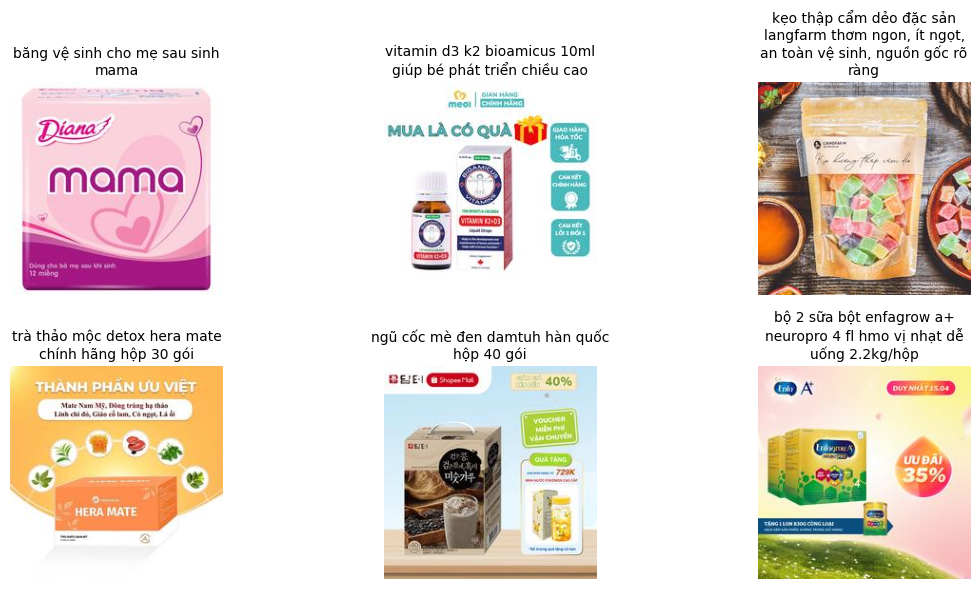

In [10]:
plot_img(images[:6], titles=titles[:6], ncols=3, figsize=(12, 6))

In [11]:
file_embed = path / "siglip_embeds.npy"
df_match_siglip = create_search_result(path=path, file_embed=file_embed, data=df)

(78265, 768)


  0%|                                                                   | 0/1 [00:00<?, ?it/s]


In [12]:
file_embed = path / "dinov2_embeds.npy"
df_match_dino = create_search_result(path=path, file_embed=file_embed, data=df)

(78265, 768)


  0%|                                                                   | 0/1 [00:00<?, ?it/s]


In [13]:
df_match_dino.tail(5)

item_id,item_name,item_name_clean,level1_global_be_category,file_path,embed,db_item_id,db_item_name,db_item_name_clean,db_level1_global_be_category,db_file_path,score
i64,str,str,str,str,"array[f32, 768]",list[i64],list[str],list[str],list[str],list[str],list[f32]
27219053422,"""Mì Dinh Dưỡng Khoai Tây Omachi…","""mì dinh dưỡng khoai tây omachi…","""Food & Beverages""","""/media/kevin/data_4t/dataset/i…","[0.003222, -0.014931, … 0.054993]","[27219053422, 12328112088, … 18582526091]","[""Mì Dinh Dưỡng Khoai Tây Omachi Sườn Hầm Ngũ Quả Phiên Bản Tết - Thùng 16 Gói x 80g"", ""Đai Định Hình Thẳng Lưng Chống Gù Lưng Trẻ Em Cao Cấp Andego Bảo Hành Lỗi 1 Đổi 1"", … ""Bộ thế Giới Động Vật 102 Chi Tiết To Dễ Lắp Ghép - Thingkids""]","[""mì dinh dưỡng khoai tây omachi sườn hầm ngũ quả phiên bản tết thùng 16 gói x 80g"", ""đai định hình thẳng lưng chống gù lưng trẻ em cao cấp andego bảo hành lỗi 1 đổi 1"", … ""bộ thế giới động vật 102 chi tiết to dễ lắp ghép thingkids""]","[""Food & Beverages"", ""Health"", … ""Mom & Baby""]","[""/media/kevin/data_4t/dataset/item_matching/img/img_/batch_78000_to_78999/78260_vn-11134201-7ra0g-m6lhrpd911nl03.jpg"", ""/media/kevin/data_4t/dataset/item_matching/img/img_/batch_64000_to_64999/64306_vn-11134207-7r98o-lyvvx8m4vt5959.jpg"", … ""/media/kevin/data_4t/dataset/item_matching/img/img_/batch_54000_to_54999/54224_sg-11134201-7qvg1-ljxxcuwo25rrc9.jpg""]","[1.000001, 0.998364, … 0.887716]"
26605774786,"""Imagic Hai Đầu Dưới Lông Mi Te…","""imagic hai đầu dưới lông mi te…","""Beauty""","""/media/kevin/data_4t/dataset/i…","[0.044281, 0.002432, … -0.040802]","[26605774786, 23407317636, … 12090393216]","[""Imagic Hai Đầu Dưới Lông Mi Tem Bút Chống Thấm Nước Trang Điểm Mắt Lâu Dài Bút Kẻ Mắt Không lem Dưới Tem Lông Mi"", ""Bông tẩy trang Cotton Pads 3 lớp dày dặn - 222 miếng"", … ""Viên uống biotin DHC Sustained Release Biotin nuôi dưỡng và kích thích mọc tóc cho cả nam nữ - Gói 30 viên""]","[""imagic hai đầu dưới lông mi tem bút chống thấm nước trang điểm mắt lâu dài bút kẻ mắt không lem dưới tem lông mi"", ""bông tẩy trang cotton pads 3 lớp dày dặn 222 miếng"", … ""viên uống biotin dhc sustained release biotin nuôi dưỡng và kích thích mọc tóc cho cả nam nữ gói 30 viên""]","[""Beauty"", ""Beauty"", … ""Health""]","[""/media/kevin/data_4t/dataset/item_matching/img/img_/batch_78000_to_78999/78261_cn-11134207-7ras8-m1w40lvp76es92.jpg"", ""/media/kevin/data_4t/dataset/item_matching/img/img_/batch_1000_to_1999/1250_vn-11134207-7r98o-lxv0esklxck9ef.jpg"", … ""/media/kevin/data_4t/dataset/item_matching/img/img_/batch_1000_to_1999/1720_vn-11134207-7ras8-m3g6d2sifzjw88.jpg""]","[1.000066, 0.882236, … 0.859667]"
16462747991,"""Sữa Rửa Mặt Da Nhạy Cảm - Da t…","""sữa rửa mặt da nhạy cảm da thư…","""Beauty""","""/media/kevin/data_4t/dataset/i…","[0.031738, 0.016205, … 0.010033]","[16462747991, 28912866172, … 29124308114]","[""Sữa Rửa Mặt Da Nhạy Cảm - Da thường/ Dưỡng Ẩm MUJI"", ""Tỏi đen cô đơn, tỏi ĐÔNG Á nguyên vỏ hỗ trợ ổn định huyết áp, hạn chế quá trình lão hóa, công nghệ Nhật Bản túi 500g"", … ""Bông Tẩy Trang Lameila 222 Miếng Chính Hãng Mới myphambamboo""]","[""sữa rửa mặt da nhạy cảm da thường/ dưỡng ẩm muji"", ""tỏi đen cô đơn, tỏi đông á nguyên vỏ hỗ trợ ổn định huyết áp, hạn chế quá trình lão hóa, công nghệ nhật bản túi 500g"", … ""bông tẩy trang lameila 222 miếng chính hãng mới myphambamboo""]","[""Beauty"", ""Health"", … ""Beauty""]","[""/media/kevin/data_4t/dataset/item_matching/img/img_/batch_78000_to_78999/78262_vn-11134207-7r98o-lwnvtluh25sp99.jpg"", ""/media/kevin/data_4t/dataset/item_matching/img/img_/batch_19000_to_19999/19697_vn-11134207-7ra0g-m70dymd9pjfl61.jpg"", … ""/media/kevin/data_4t/dataset/item_matching/img/img_/batch_59000_to_59999/59022_vn-11134201-7ras8-m5cd0daoj8t30a.jpg""]","[1.00027, 0.778647, … 0.757383]"
7659965816,"""Bột Lá Tía Tô Sấy Lạnh Nguyên …","""bột lá tía tô sấy lạnh nguyên …","""Food & Beverages""","""/media/kevin/data_4t/dataset/i…","[0.016525, 0.014191, … 0.029999]","[765

In [14]:
dict_dino = df_match_dino.to_dicts()
dict_siglip = df_match_siglip.to_dicts()

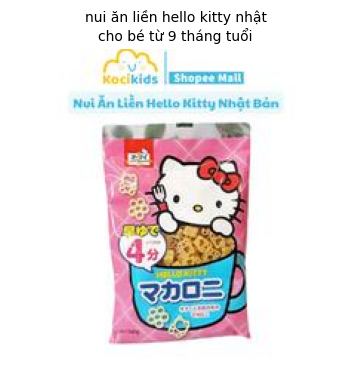

In [39]:
idx = 23499
lst_img = [dict_dino[idx]["file_path"]]
titles = [dict_dino[idx]["item_name_clean"]]
plot_img(lst_img, titles=titles, ncols=1, figsize=(4, 4))

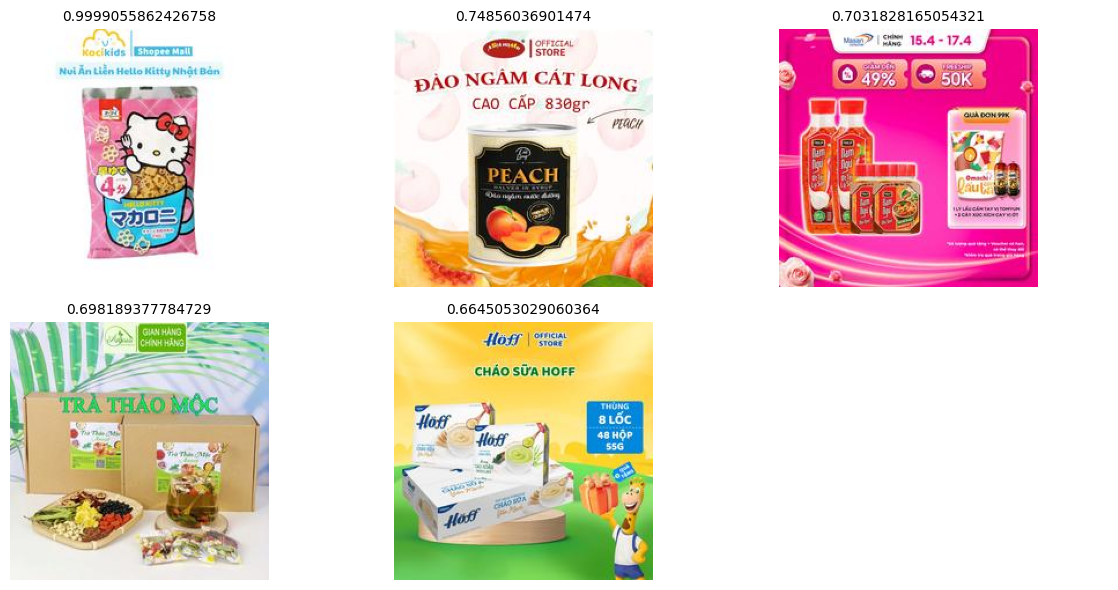

In [40]:
lst_img = dict_dino[idx]["db_file_path"]
titles = dict_dino[idx]["score"]
plot_img(lst_img, titles=titles, ncols=3, figsize=(12, 6))

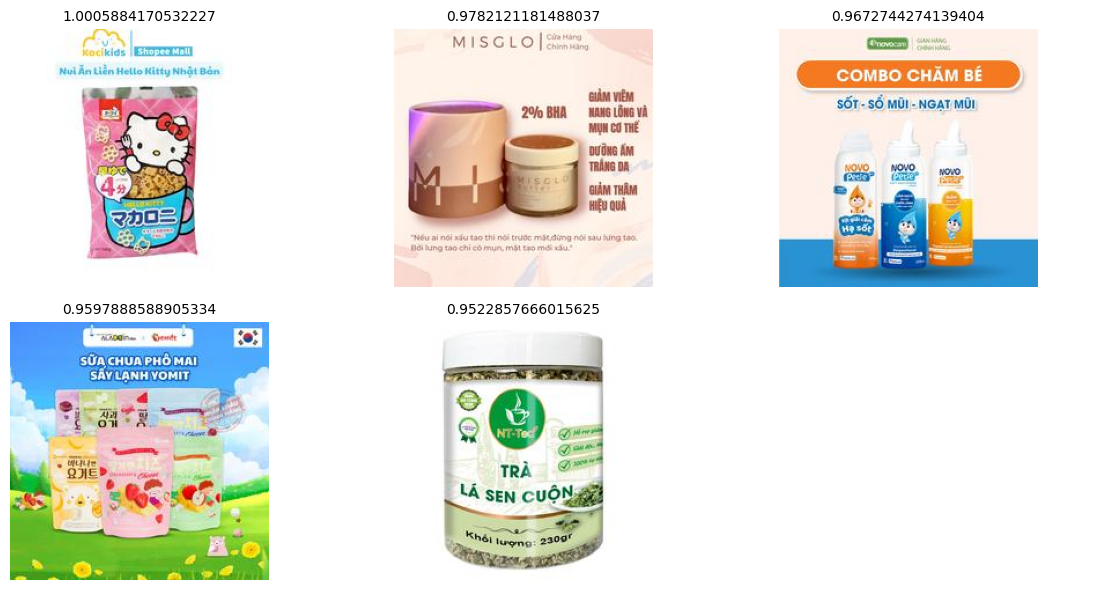

In [41]:
lst_img = dict_siglip[idx]["db_file_path"]
titles = dict_siglip[idx]["score"]
plot_img(lst_img, titles=titles, ncols=3, figsize=(12, 6))